#### Data Clean for housing statistics for all condos in DC

- Data is pre-cleaned as floats for all variable with a time variable
- Data is saved in "data" folder as house_preclean_data.csv

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Create a time variable
time_frame = pd.date_range('2010-01-01','2019-11-01', 
              freq='MS').strftime("%Y-%b").tolist()

df_temp = pd.DataFrame(time_frame, columns = ['Time'])
df = pd.read_csv("../../data/data_crosstab_condo.csv",  encoding='utf-16', sep='\t' )

In [3]:
# reformat all housing variables from string to float

df_temp["Median Sale Price"] = df["Median Sale Price"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["Median Sale Price MoM"] = df["Median Sale Price MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Median Sale Price YoY"] = df["Median Sale Price YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["Homes Sold"] = df["Homes Sold"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["Homes Sold MoM"] = df["Homes Sold MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Homes Sold YoY"] = df["Homes Sold YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["New Listings"] = df["New Listings"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["New Listings MoM"] = df["New Listings MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["New Listings YoY"] = df["New Listings YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["Inventory"] = df["Inventory"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["Inventory MoM"] = df["Inventory MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Inventory YoY"] = df[" Inventory YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["Days on Market"] = df["Days on Market"]
df_temp["Days on Market MoM"] = df["Days on Market MoM"]
#df_temp["Days on Market YoY"] = df["Days on Market YoY"]



df_temp["Average Sale To List%"] = df["Average Sale To List"].str.replace(",", "").str.replace("%", "").str.replace("K","000").astype(float)
df_temp["Average Sale To List MoM"] = df["Average Sale To List MoM "].str.replace(",", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Average Sale To List YoY"] = df["Average Sale To List YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)


In [4]:
df = []
df = df_temp[1:119]
df.to_csv("../../data/house_preclean_data.csv", index = False)

In [5]:
df

,Time,Median Sale Price,Median Sale Price MoM,Homes Sold,Homes Sold MoM,New Listings,New Listings MoM,Inventory,Inventory MoM,Days on Market,Days on Market MoM,Average Sale To List%,Average Sale To List MoM
1,2010-Feb,250000.0,11.1,521.0,-3.9,1085.0,-2.3,3346.0,6.5,51,-5.0,98.2,0.4
2,2010-Mar,237000.0,-5.2,786.0,50.9,1681.0,54.9,3670.0,9.7,42,-9.0,98.2,0.0
3,2010-Apr,260000.0,9.7,909.0,15.6,1719.0,2.3,3892.0,6.0,28,-14.0,98.1,-0.1
4,2010-May,250000.0,-3.8,988.0,8.7,1029.0,-40.1,3874.0,-0.5,30,2.0,98.0,-0.1
5,2010-Jun,240000.0,-4.0,962.0,-2.6,1260.0,22.4,3907.0,0.9,35,5.0,98.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2019-Jul,318000.0,-2.2,1094.0,0.5,1172.0,0.9,1694.0,-3.3,22,2.0,100.0,0.1
115,2019-Aug,300000.0,-5.7,1074.0,-1.8,972.0,-17.1,1540.0,-9.1,25,3.0,99.7,-0.3
116,2019-Sep,315000.0,5.0,888.0,-17.3,1218.0,25.3,1692.0,9.9,25,0.0,99.4,-0.3
117,2019-Oct,330000.0,4.7,982.0,10.6,1100.0,-9.7,1735.0,2.5,25,0.0,99.6,0.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 1 to 118
Data columns (total 13 columns):
Time                        118 non-null object
Median Sale Price           118 non-null float64
Median Sale Price MoM       118 non-null float64
Homes Sold                  118 non-null float64
Homes Sold MoM              118 non-null float64
New Listings                118 non-null float64
New Listings MoM            118 non-null float64
Inventory                   118 non-null float64
Inventory MoM               118 non-null float64
Days on Market              118 non-null int64
Days on Market MoM          118 non-null float64
Average Sale To List%       118 non-null float64
Average Sale To List MoM    118 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 12.1+ KB


In [7]:
df.describe()

,Median Sale Price,Median Sale Price MoM,Homes Sold,Homes Sold MoM,New Listings,New Listings MoM,Inventory,Inventory MoM,Days on Market,Days on Market MoM,Average Sale To List%,Average Sale To List MoM
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,279271.186441,0.377966,858.923729,1.568644,1079.000000,2.761864,2291.906780,-0.301695,33.483051,-0.237288,98.594915,0.011017
std,27164.475613,4.082842,184.114334,16.425573,282.268648,26.502101,629.643652,7.828231,13.112748,7.542107,0.686356,0.274807
min,213000.000000,-8.300000,513.000000,-34.500000,464.000000,-40.100000,1387.000000,-24.600000,12.000000,-26.000000,97.100000,-0.600000
25%,260250.000000,-2.375000,725.500000,-9.150000,882.750000,-16.875000,1804.250000,-5.375000,23.500000,-4.000000,98.200000,-0.200000
50%,288500.000000,0.000000,843.500000,1.150000,1085.500000,-3.100000,2172.500000,-0.400000,30.000000,1.000000,98.700000,0.000000
75%,299000.000000,3.175000,999.500000,12.025000,1264.750000,14.300000,2657.250000,5.475000,43.000000,3.750000,99.100000,0.200000
max,330000.000000,11.100000,1253.000000,50.900000,1719.000000,78.900000,3907.000000,19.500000,75.000000,20.000000,100.000000,0.700000


####  Set up transformed variables for housing statistics

In [8]:
df = pd.read_csv("../../data/house_preclean_data.csv")
df1 = pd.read_csv("../../data/macro.csv")

In [9]:
df = pd.concat([df, df1], axis=1, sort=False)
df.to_csv("../../data/full_data.csv", index = False)

In [11]:
df = pd.read_csv("../../data/full_data.csv")

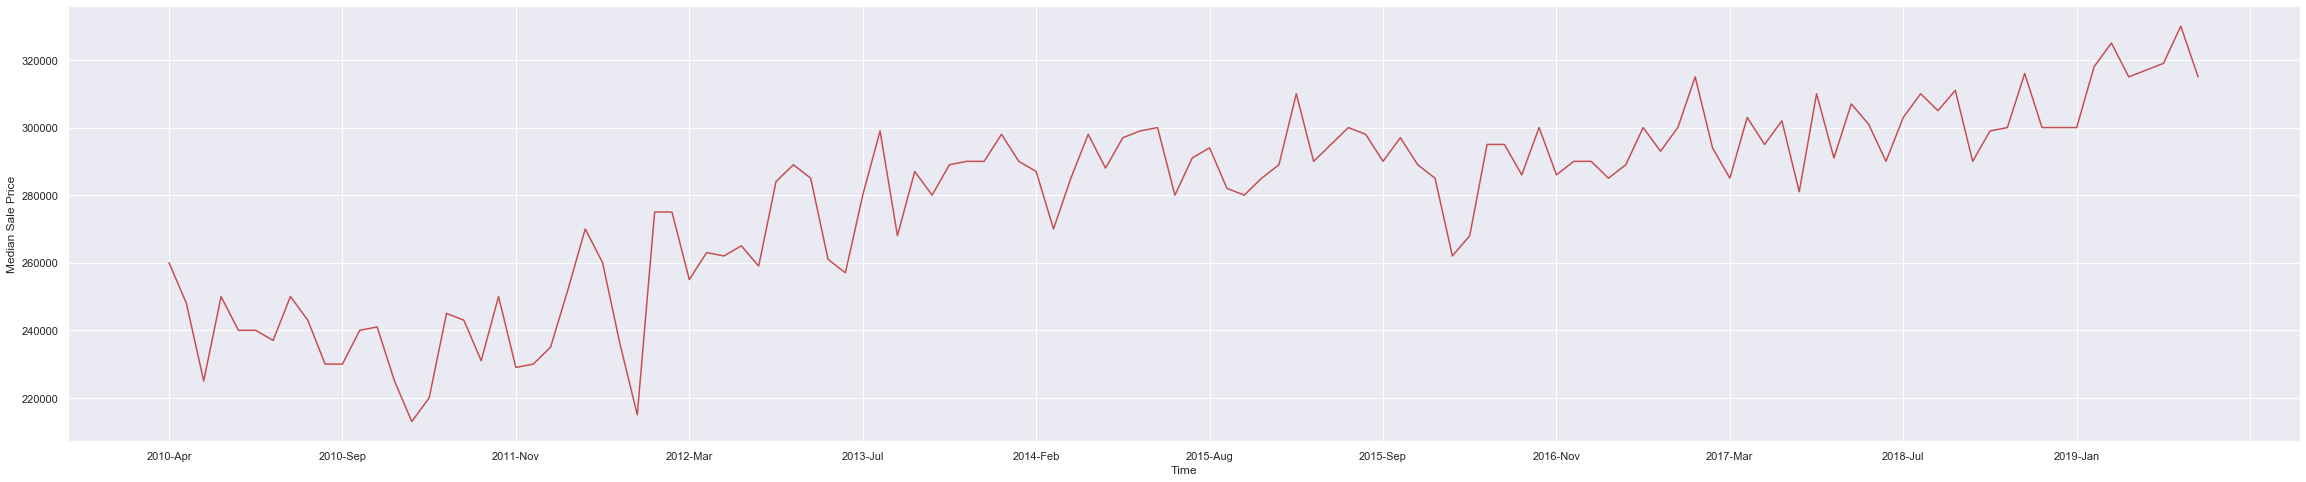

In [59]:
ax1 = sns.lineplot(x="Time", y="Median Sale Price", color = 'r', data = df)
sns.set(rc={'figure.figsize':(40,8)})
plt.xticks(range(0, 130, 10))
plt.show()

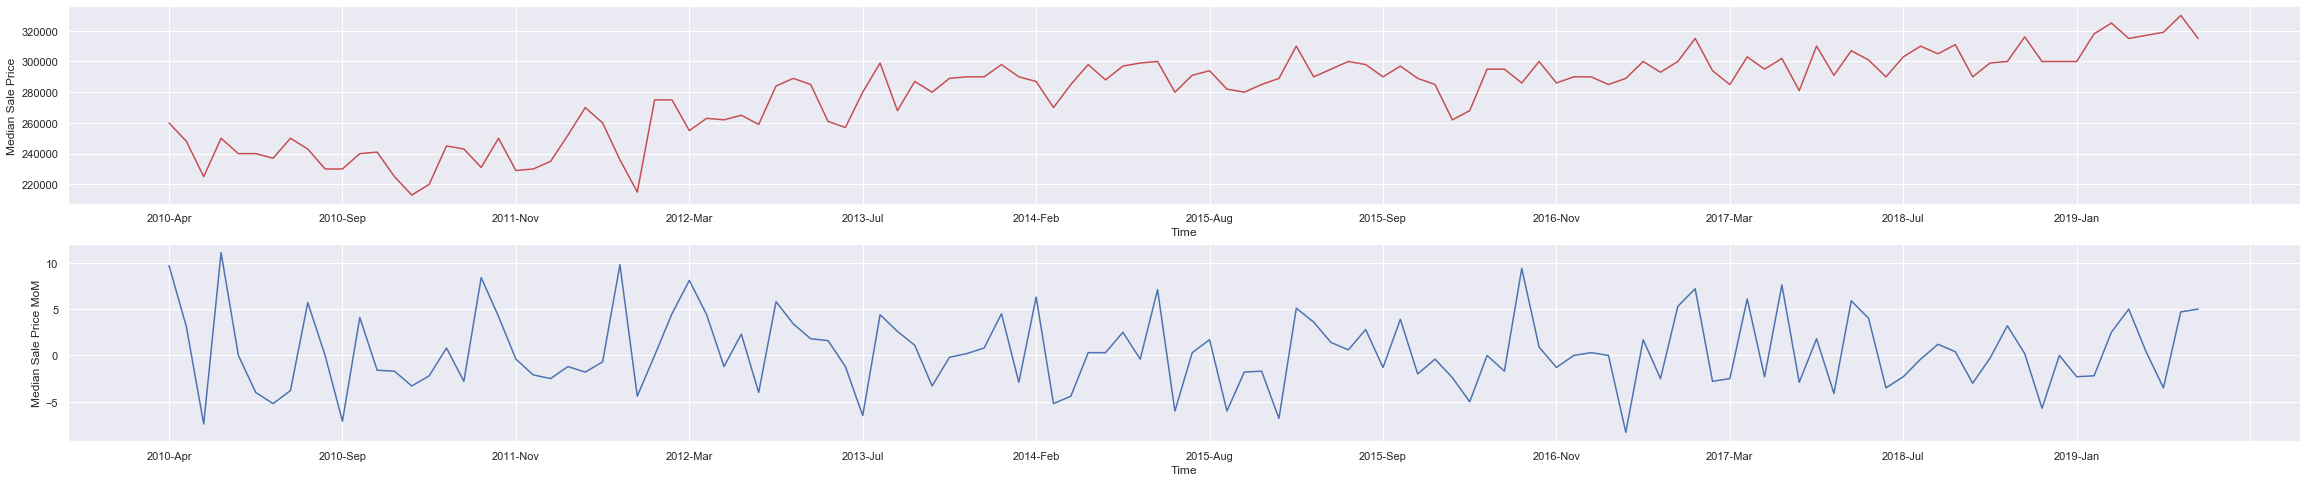

In [60]:
plt.subplot(2, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(2, 1, 2)
sns.lineplot(x = "Time", y = "Median Sale Price MoM", data = df)
plt.xticks(range(0, 130, 10))

sns.set(rc={'figure.figsize':(40,8)})
plt.show()

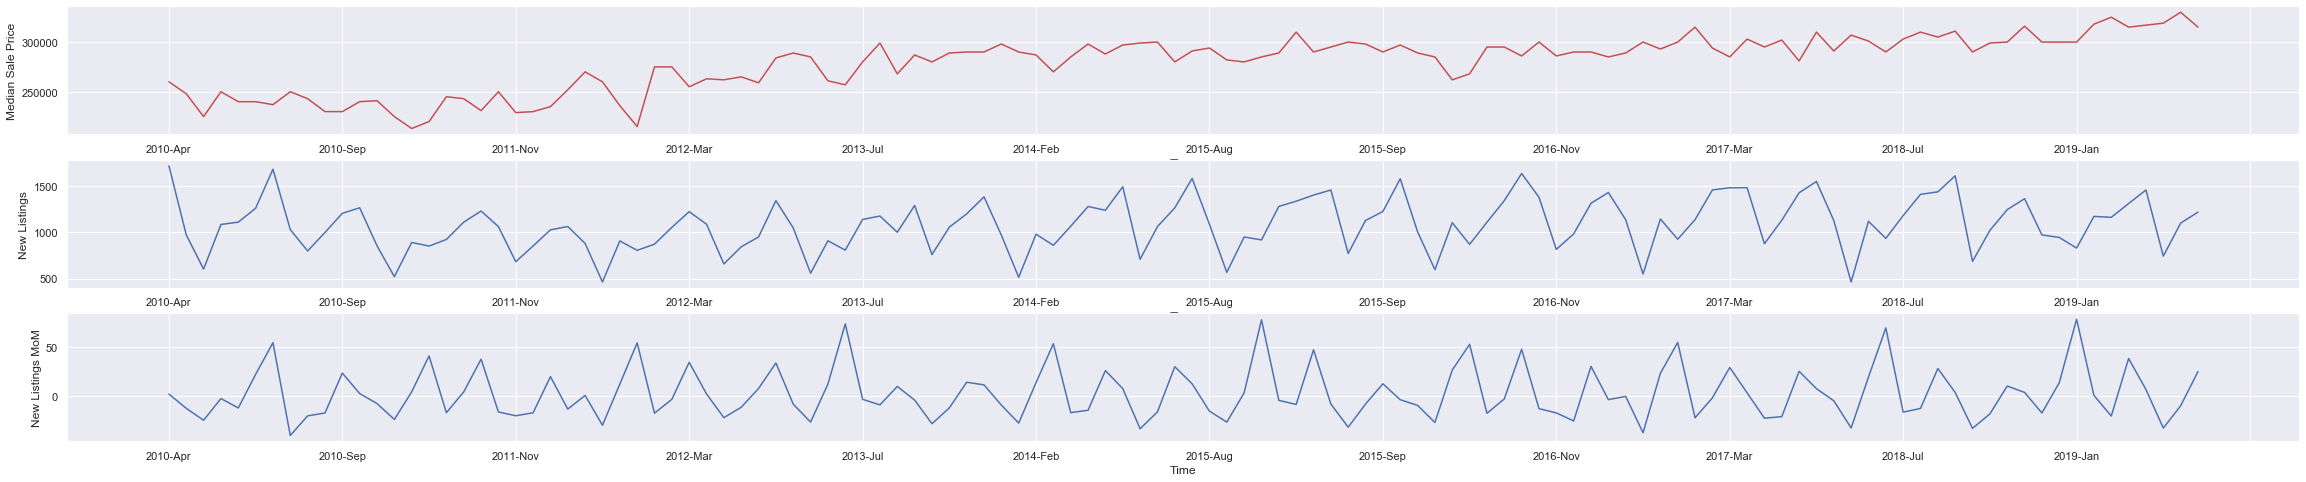

In [61]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "New Listings", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "New Listings MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

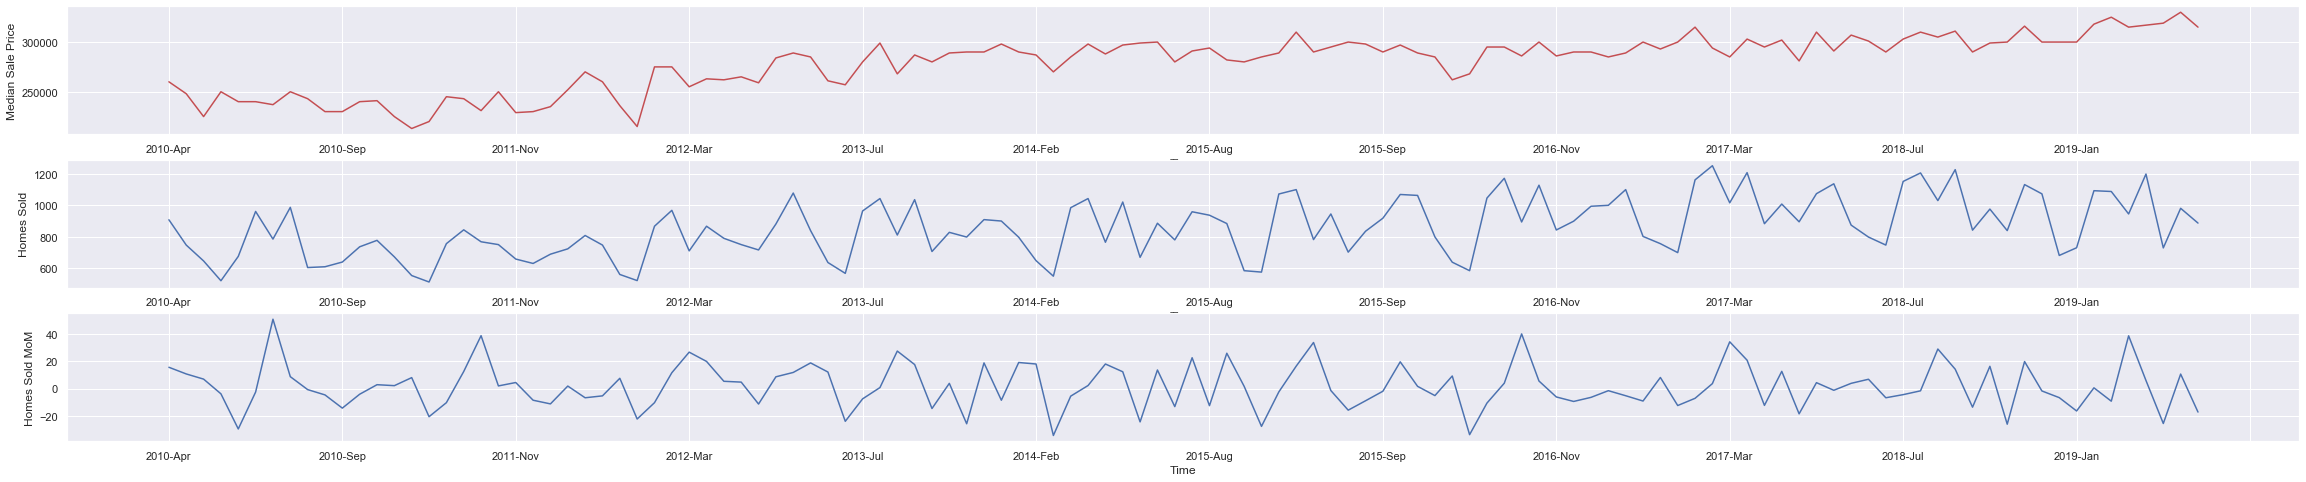

In [62]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Homes Sold", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Homes Sold MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

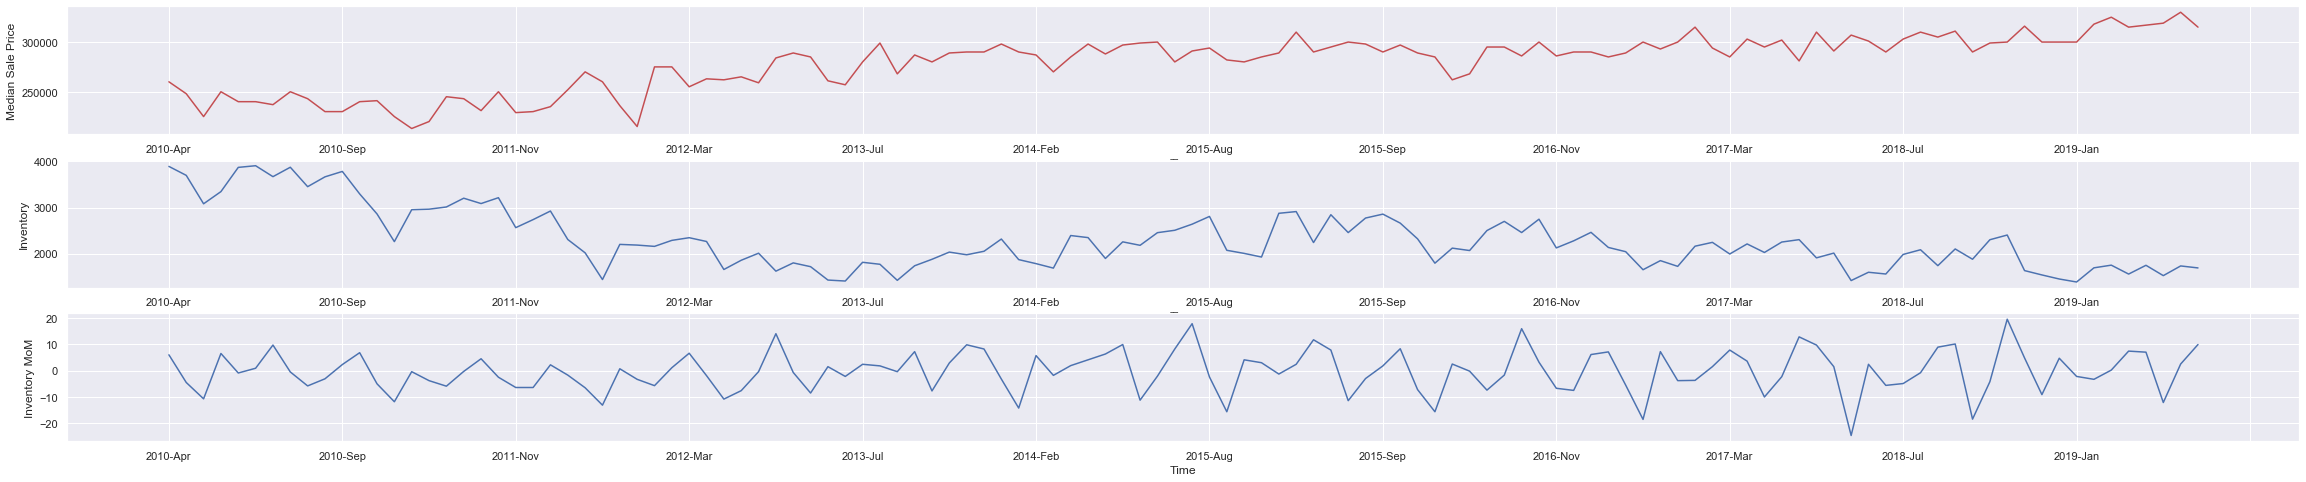

In [63]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Inventory", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Inventory MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

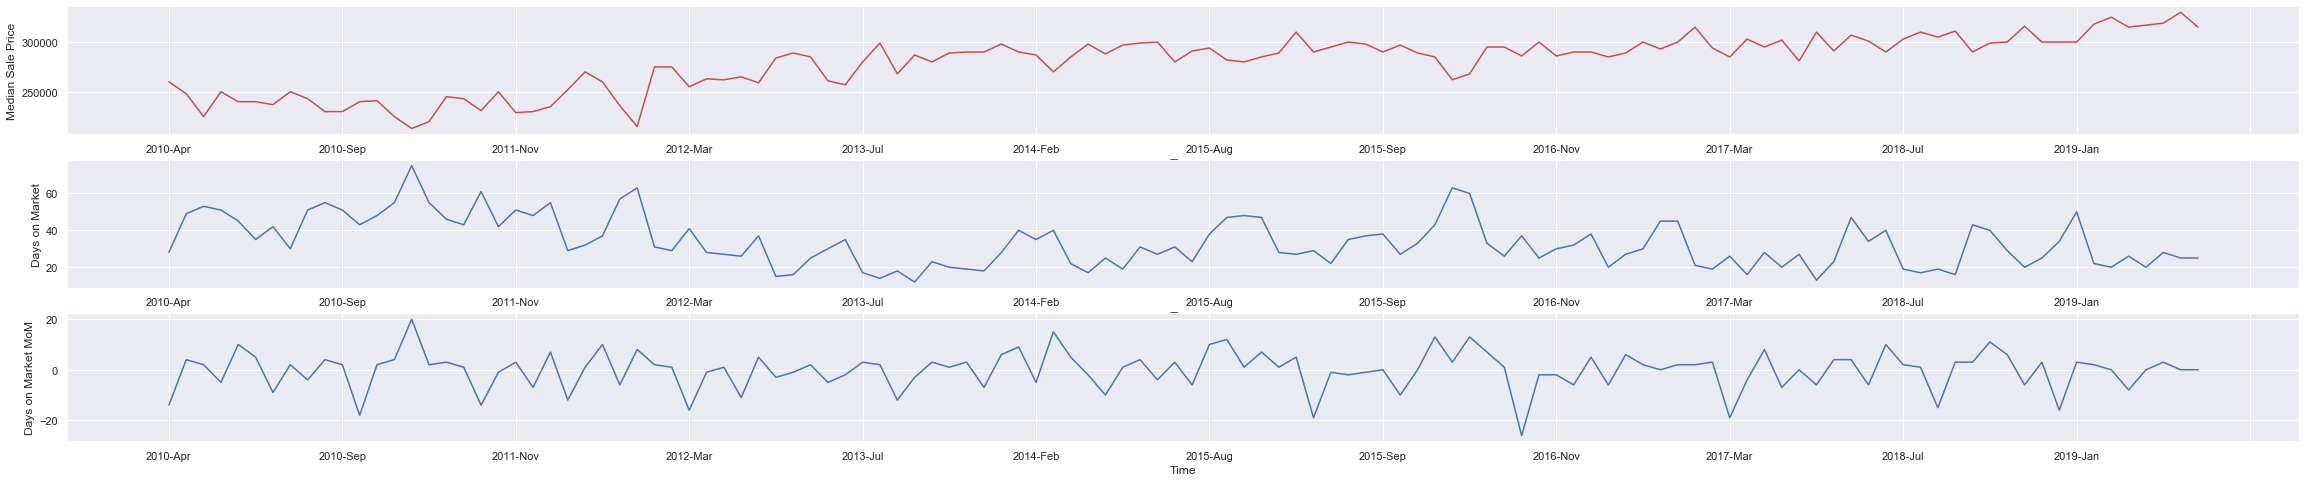

In [64]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Days on Market", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Days on Market MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

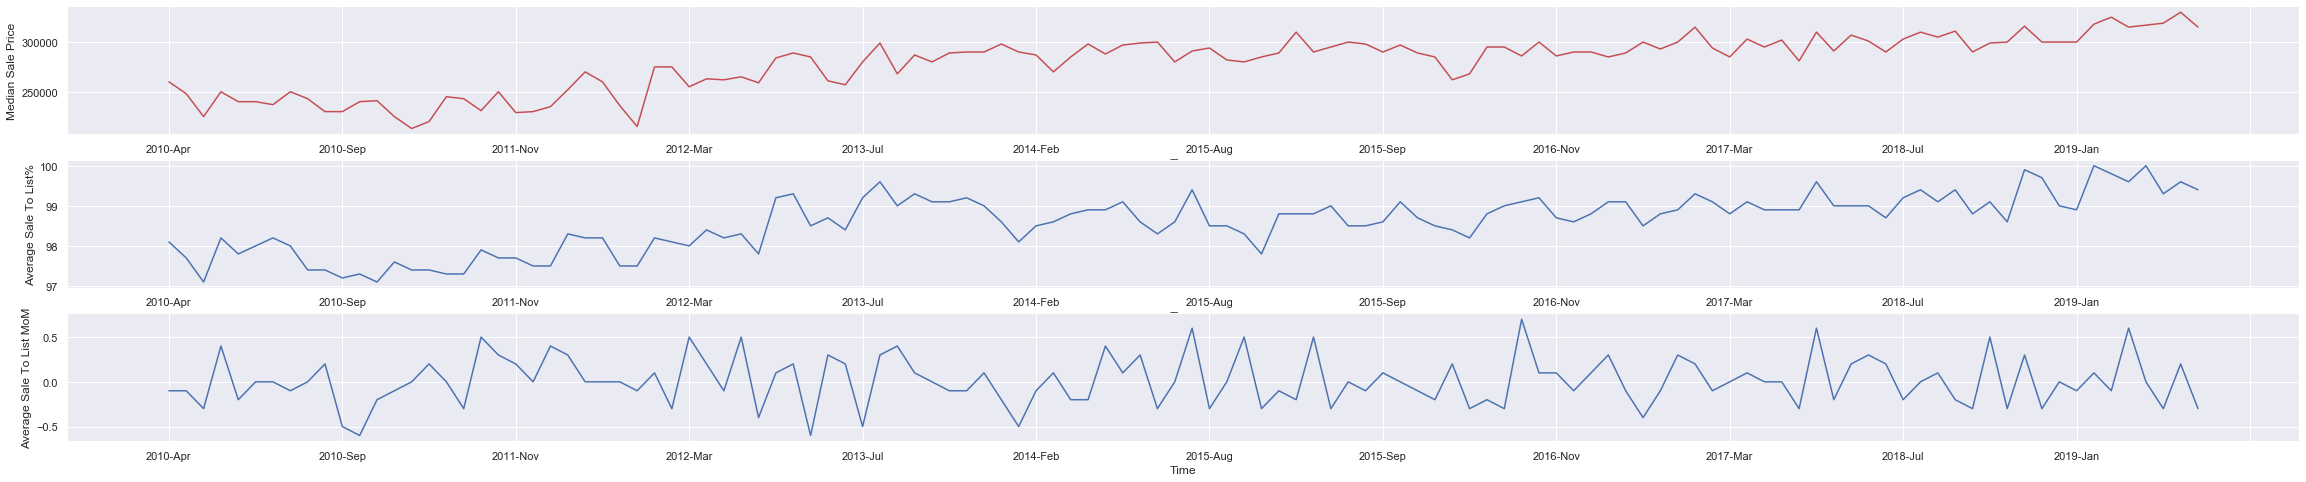

In [65]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Average Sale To List%", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Average Sale To List MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()